# Data &Data Technical Challenge

Welcome to the Data&Data technical challenge! We are delighted to offer you the opportunity to show us your skills in the some of technical challenges you may face here at Data&Data. This challenge is **not** about getting the right answer : the most important thing is to show _how_ you think, _how_ you approach problems, and how you code! 

The challenge is based on scraped data from the website www.chrono24.com. In the same directory as this notebook, there is the tab-separated values file called _chrono24_scraped_data.tsv_. This file shall be used for the analysis. There is a second file, _references.tsv_ , containing references codes for watches, which should be used when instructed in the questions below. Good luck!

In [516]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [480]:
chrono_df = pd.read_csv("chrono24_scraped_data.tsv", sep='\t')
references_df = pd.read_csv("references.tsv", sep='\t')
chrono_df.head()


condition                    delivery             found_on  \
0       New  Jan 8, 2020 - Jan 20, 2020  2019/12/23 16:06:17   
1    Unworn  Jan 8, 2020 - Jan 20, 2020  2019/12/23 16:06:19   
2    Unworn  Jan 8, 2020 - Jan 20, 2020  2019/12/23 16:06:19   
3    Unworn  Jan 8, 2020 - Jan 20, 2020  2019/12/23 16:06:19   
4    Unworn  Jan 8, 2020 - Jan 20, 2020  2019/12/23 16:06:19   

                    model   price     seller  \
0                  Santos   3,735  12enpunto   
1  Exospace B55 Connected   5,648  12enpunto   
2          Chrono Cockpit   2,598  12enpunto   
3         Tank Américaine  11,885  12enpunto   
4                     NaN   1,698  12enpunto   

                                seller_url  \
0  chrono24.com/dealer/12enpunto/index.htm   
1  chrono24.com/dealer/12enpunto/index.htm   
2  chrono24.com/dealer/12enpunto/index.htm   
3  chrono24.com/dealer/12enpunto/index.htm   
4  chrono24.com/dealer/12enpunto/index.htm   

                                    title  \
0  Cartier W20066D6 Santos Lady Automatic   
1        Breitling Exospace B55 Connected   
2                       Breitling Cockpit   
3         Cartier W2605456 Tank Americano   
4                     Breitling Windrider   

                                                 url            watch_year  \
0  https://www.chrono24.com/cartier/w20066d6-sant...               Unknown   
1  https://www.chrono24.com/breitling/exospace-b5...  2018 (Approximation)   
2  https://www.chrono24.com/breitling/cockpit--id...                  2005   
3  https://www.chrono24.com/cartier/w2605456-tank...               Unknown   
4  https://www.chrono24.com/breitling/windrider--...               Unknown   

                                              raw  
0      Cartier W20066D6 Santos Lady Automatic nan  
1  Breitling Exospace B55 Connected VB5510H2/BE45  
2                    Breitling Cockpit A13358A596  
3                 Cartier W2605456 Tank Americano  
4                      Breitling Windrider B10050

In [481]:
references_df.drop(columns={'Unnamed: 0'})

brand             reference
0     Audemars Piguet                 14790
1     Audemars Piguet               14790ST
2     Audemars Piguet                 14908
3     Audemars Piguet  15202OR.OO.1240OR.01
4     Audemars Piguet  15202ST.OO.0944ST.01
...               ...                   ...
2348           Zenith  65.1260.4005/77.C611
2349           Zenith  95.9000.9004/78.R582
2350           Zenith  96.0525.4000/21.M525
2351           Zenith          96.0527.4021
2352           Zenith  96.0550.4007/77.C550

[2353 rows x 2 columns]

In [482]:
chrono_df = chrono_df[~chrono_df.condition.isna()]
chrono_df.price = pd.to_numeric(chrono_df.price.str.replace(',', '', regex=False), errors='coerce')
chrono_df.found_on = pd.to_datetime(chrono_df.found_on)

### 1. How many watch brands are in the file? What are the top 5 brands by number of offers?

In [483]:
chrono_df['brand'] = chrono_df.url.str.extract(r'com/(.*?)/')
print("we have %i brands in this dataset: \n" % len(chrono_df.brand.unique()), chrono_df.brand.unique())


we have 24 brands in this dataset: 
 ['cartier' 'breitling' 'tagheuer' 'panerai' 'rolex' 'patekphilippe'
 'audemarspiguet' 'omega' 'hublot' 'ulyssenardin' 'franckmuller'
 'baumemercier' 'vacheronconstantin' 'tudor' 'piaget' 'zenith' 'iwc'
 'jaegerlecoultre' 'alangesoehne' 'richardmille' 'longines' 'bulgari'
 'rogerdubuis' 'seiko']


In [484]:
chrono_df.brand.value_counts(sort=True, ascending=False)


rolex                 9321
omega                 6355
breitling             4080
hublot                3443
tagheuer              3287
longines              2293
patekphilippe         2115
audemarspiguet        1753
iwc                   1493
ulyssenardin          1420
cartier               1418
seiko                 1404
panerai               1124
zenith                1114
bulgari               1028
tudor                  922
jaegerlecoultre        836
baumemercier           784
vacheronconstantin     366
franckmuller           345
piaget                 314
alangesoehne           219
rogerdubuis            151
richardmille           151
Name: brand, dtype: int64

## 2. Are these new/unworn or second hand watches?

In [485]:
chrono_df.groupby('condition').size()

condition
New       35880
Unworn     9856
dtype: int64

## 3. Which are the most active sellers on chrono24.com? Are any sellers brand specialists?

In [486]:
sellers_ = chrono_df.groupby(['seller','brand'], as_index=False, group_keys=False).size()
sellers_.seller.value_counts(sort=False)==1

UHREN-NAGEL                          False
Elegant Watches                      False
Omi Jewelry                          False
L'horlogiste                         False
Watches4me                           False
                                     ...  
Certified Watch Store                False
Jigsaw Watches                        True
ENCHEREXPERT                         False
Le Muse sas                           True
Freddie Keeble Watches & Diamonds    False
Name: seller, Length: 717, dtype: bool

In [487]:
sellers_brands = chrono_df.groupby(['seller','brand'], group_keys=False)['url'].count()
sellers_brands = sellers_brands.unstack().fillna(0)
sellers_brands = sellers_brands.astype({col: 'int64' for col in sellers_brands.columns})
sellers_brands['total'] = sellers_brands.sum(axis=1)
sellers_brands = sellers_brands.sort_values('total', ascending=False)
sellers_brands['total'].head(10)

seller
Interwatches                4594
Prestige Luxusuhren GmbH    3013
Horando Deutschland GmbH    2018
Timepiece Perfection        1960
CKLY Trading Limited        1750
Fabel-Time GmbH             1691
Gemnation                   1531
HarveyStore DE              1194
Helvetic Time AG            1022
Luxury Souq Dubai            886
Name: total, dtype: int64

In [488]:
sellers_brands = chrono_df.groupby(['seller','brand'], group_keys=False).size().unstack()
sellers_brands.columns = list(map(''.join, sellers_brands.columns.values))
sellers_brands = sellers_brands.reset_index().fillna(0)
sellers_brands = sellers_brands.astype({col: 'int64' for col in sellers_brands.columns[1:]})
sellers_brands['total'] = sellers_brands.sum(axis=1)
sellers_brands[['seller','total']].sort_values('total', ascending=False).head(10)

seller  total
403              Interwatches   4594
591  Prestige Luxusuhren GmbH   3013
378  Horando Deutschland GmbH   2018
638      Timepiece Perfection   1960
119      CKLY Trading Limited   1750
268           Fabel-Time GmbH   1691
306                 Gemnation   1531
360            HarveyStore DE   1194
365          Helvetic Time AG   1022
523         Luxury Souq Dubai    886

# 4. Using the references.tsv  file, create an algorithm and extract as many references as you can from the chrono24 scraped data

In [489]:
reference_set = set(references_df.reference)
def get_reference(title):
    ref = set(title.split()).intersection(reference_set)
    if bool(ref):
        return ref.pop()
    else:
        return None
chrono_df['reference'] = chrono_df.raw.apply(get_reference)
chrono_df[chrono_df.reference.notna()]

condition                    delivery            found_on        model  \
4        Unworn  Jan 8, 2020 - Jan 20, 2020 2019-12-23 16:06:19          NaN   
7           New  Dec 25, 2019 - Jan 2, 2020 2019-12-23 16:06:24      Daytona   
11          New  Dec 25, 2019 - Jan 2, 2020 2019-12-23 16:06:27      Autavia   
13          New  Dec 25, 2019 - Jan 2, 2020 2019-12-23 16:06:37      Daytona   
14       Unworn                         NaN 2019-12-23 16:06:44  Sky-Dweller   
...         ...                         ...                 ...          ...   
45721       New  Dec 25, 2019 - Jan 2, 2020 2019-12-23 22:25:13  Travel Time   
45733       New  Jan 8, 2020 - Jan 20, 2020 2019-12-23 22:25:36  Sky-Dweller   
45734    Unworn  Jan 3, 2020 - Jan 11, 2020 2019-12-23 22:25:37  Day-Date 40   
45735       New                         NaN 2019-12-23 22:25:39     Nautilus   
45736    Unworn  Jan 3, 2020 - Jan 11, 2020 2019-12-23 22:25:48      Daytona   

         price                         seller  \
4       1698.0                      12enpunto   
7          NaN       UMBERTO DI BELLA OROLOGI   
11      5942.0       UMBERTO DI BELLA OROLOGI   
13         NaN       UMBERTO DI BELLA OROLOGI   
14     46294.0                  juwelier Kö98   
...        ...                            ...   
45721  48050.0              Master Luxury USA   
45733  48760.0  Masterpiece Jewellers Limited   
45734  38216.0  Masterpiece Jewellers Limited   
45735  70514.0  Masterpiece Jewellers Limited   
45736  28337.0  Masterpiece Jewellers Limited   

                                        seller_url  \
4          chrono24.com/dealer/12enpunto/index.htm   
7             chrono24.com/dealer/140875/index.htm   
11            chrono24.com/dealer/140875/index.htm   
13            chrono24.com/dealer/140875/index.htm   
14         chrono24.com/dealer/2019kurti/index.htm   
...                                            ...   
45721  chrono24.com/dealer/masterluxury1/index.htm   
45733    chrono24.com/dealer/masterpiece/index.htm   
45734    chrono24.com/dealer/masterpiece/index.htm   
45735    chrono24.com/dealer/masterpiece/index.htm   
45736    chrono24.com/dealer/masterpiece/index.htm   

                                                   title  \
4                                    Breitling Windrider   
7      Rolex Daytona Meteorite Dial (Rolex Warranty D...   
11          TAG Heuer Autavia special edition jack heuer   
13           Rolex Cosmograph Daytona Platinum 116576TBR   
14                     Rolex Sky-Dweller Everose Rhodium   
...                                                  ...   
45721  Patek Philippe 5524G-001 Complications Pilot T...   
45733                Rolex Sky-Dweller Rare Rhodium Dial   
45734                                  Rolex Day-Date 40   
45735                            Patek Philippe Nautilus   
45736                                      Rolex Daytona   

                                                     url watch_year  \
4      https://www.chrono24.com/breitling/windrider--...    Unknown   
7      https://www.chrono24.com/rolex/daytona-meteori...       2016   
11     https://www.chrono24.com/tagheuer/autavia-spec...       2019   
13     https://www.chrono24.com/rolex/rolex-cosmograp...       2016   
14     https://www.chrono24.com/rolex/sky-dweller-eve...       2019   
...                                                  ...        ...   
45721  https://www.chrono24.com/patekphilippe/5524g-0...       2017   
45733  https://www.chrono24.com/rolex/sky-dweller-rar...       2019   
45734  https://www.chrono24.com/rolex/day-date-40--id...       2019   
45735  https://www.chrono24.com/patekphilippe/nautilu...       2019   
45736  https://www.chrono24.com/rolex/daytona--id1281...       2019   

                                                     raw          brand  \
4                             Breitling Windrider B10050      breitling   
7      Rolex Daytona Meteorite Dial (Rolex Warranty D...          rolex   
11     T

# 5. Which references are most popular for the years 2016-2019?

In [490]:
chrono_df.watch_year = chrono_df.watch_year.str.extract('(\d+)').astype('float64')

In [492]:

chrono_df[(chrono_df.watch_year >=2016) & (chrono_df.watch_year <=2019)].reference.value_counts(sort=True, ascending=False)

126334                  167
126300                  144
116500LN                136
126710BLNR              113
126333                  105
                       ... 
116263                    1
A37330                    1
5975R-001                 1
15350ST.OO.D002CR.01      1
CAR2B80.FC6325            1
Name: reference, Length: 517, dtype: int64

# 6. Provide summary statistics of prices (USD) for watches by brand. Which statistics are most insightful to provide context for the prices of a brand's watches?

In [521]:
def q_25(x):
    return x.quantile(.25)

def q_75(x):
    return x.quantile(.75)

def gini(x):
        x = np.sort(np.asarray(x))
        n = len(x)
        cumx = np.cumsum(x, dtype=float)
        return (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n

chrono_df[chrono_df.price.notna()].groupby(['brand']).agg({'price': ['count', 'mean','min',  q_25, 'median', q_75, 'max', gini]})

price                                               \
                   count           mean      min       q_25    median   
brand                                                                   
alangesoehne         205   59224.014634   4215.0   25349.00   39538.0   
audemarspiguet      1339   53115.516057    339.0   25417.00   34280.0   
baumemercier         781    2598.683739    345.0    1469.00    2248.0   
breitling           3816    5464.095126    503.0    3705.00    4852.0   
bulgari              946   11363.467230   1467.0    4633.25    7197.5   
cartier             1247   12138.318364    146.0    5021.00    7380.0   
franckmuller         320   16976.775000    892.0    7483.75   11900.0   
hublot              3290   20524.729483   1450.0    9800.00   15500.0   
iwc                 1456   12047.731456    429.0    5483.50    8855.0   
jaegerlecoultre      677   14402.100443   1220.0    6834.00    9717.0   
longines            2291    1672.339153    328.0    1009.00    1402.0   
omega               5868    8424.612474    141.0    4245.75    5750.0   
panerai             1063   10742.268109   1582.0    6646.00    8246.0   
patekphilippe       1619   91261.091414    271.0   42814.00   64480.0   
piaget               294   20838.442177   1243.0   11711.75   18564.0   
richardmille          71  214585.225352  64955.0  163376.00  199000.0   
rogerdubuis          148   38765.540541    339.0   12853.00   21457.5   
rolex               6902   19486.441466    253.0   10275.00   14699.0   
seiko               1400     757.451429     69.0     163.75     259.0   
tagheuer            3279    3130.715157    198.0    1639.00    2405.0   
tudor                909    3498.287129    904.0    2655.00    3396.0   
ulyssenardin        1190   17242.600840    573.0    6767.00    9500.0   
vacheronconstantin   350   25932.365714   2796.0   16659.50   22358.5   
zenith              1105    9224.221719    395.0    5407.00    6732.0   

                                                    
                         q_75        max      gini  
brand                                               
alangesoehne         75560.00   360000.0  0.411510  
audemarspiguet       55000.00   695113.0  0.420981  
baumemercier          3107.00    16322.0  0.325669  
breitling             6349.00    41718.0  0.240555  
bulgari              11518.00   168000.0  0.467034  
cartier              13208.50   159409.0  0.469854  
franckmuller         18200.00    95400.0  0.426289  
hublot               24242.00   304282.0  0.393411  
iwc                  12215.75   203337.0  0.417385  
jaegerlecoultre      14911.00   327598.0  0.419710  
longines              2008.00    26999.0  0.286327  
omega                 8900.00   580000.0  0.405777  
panerai              11184.00   129910.0  0.314772  
patekphilippe        97613.50  2400000.0  0.435756  
piaget               25336.75   200000.0  0.330515  
richardmille        269500.00   669500.0  0.221969  
rogerdubuis          41790.00   264000.0  0.529386  
rolex                23440.00   847237.0  0.364279  
seiko                  428.25    18750.0  0.677793  
tagheuer              3757.00    75630.0  0.355484  
tudor                 4061.00    18356.0  0.184447  
ulyssenardin         19661.25   600000.0  0.473415  
vacheronconstantin   29976.00   269000.0  0.302465  
zenith                8987.00   125000.0  0.360996

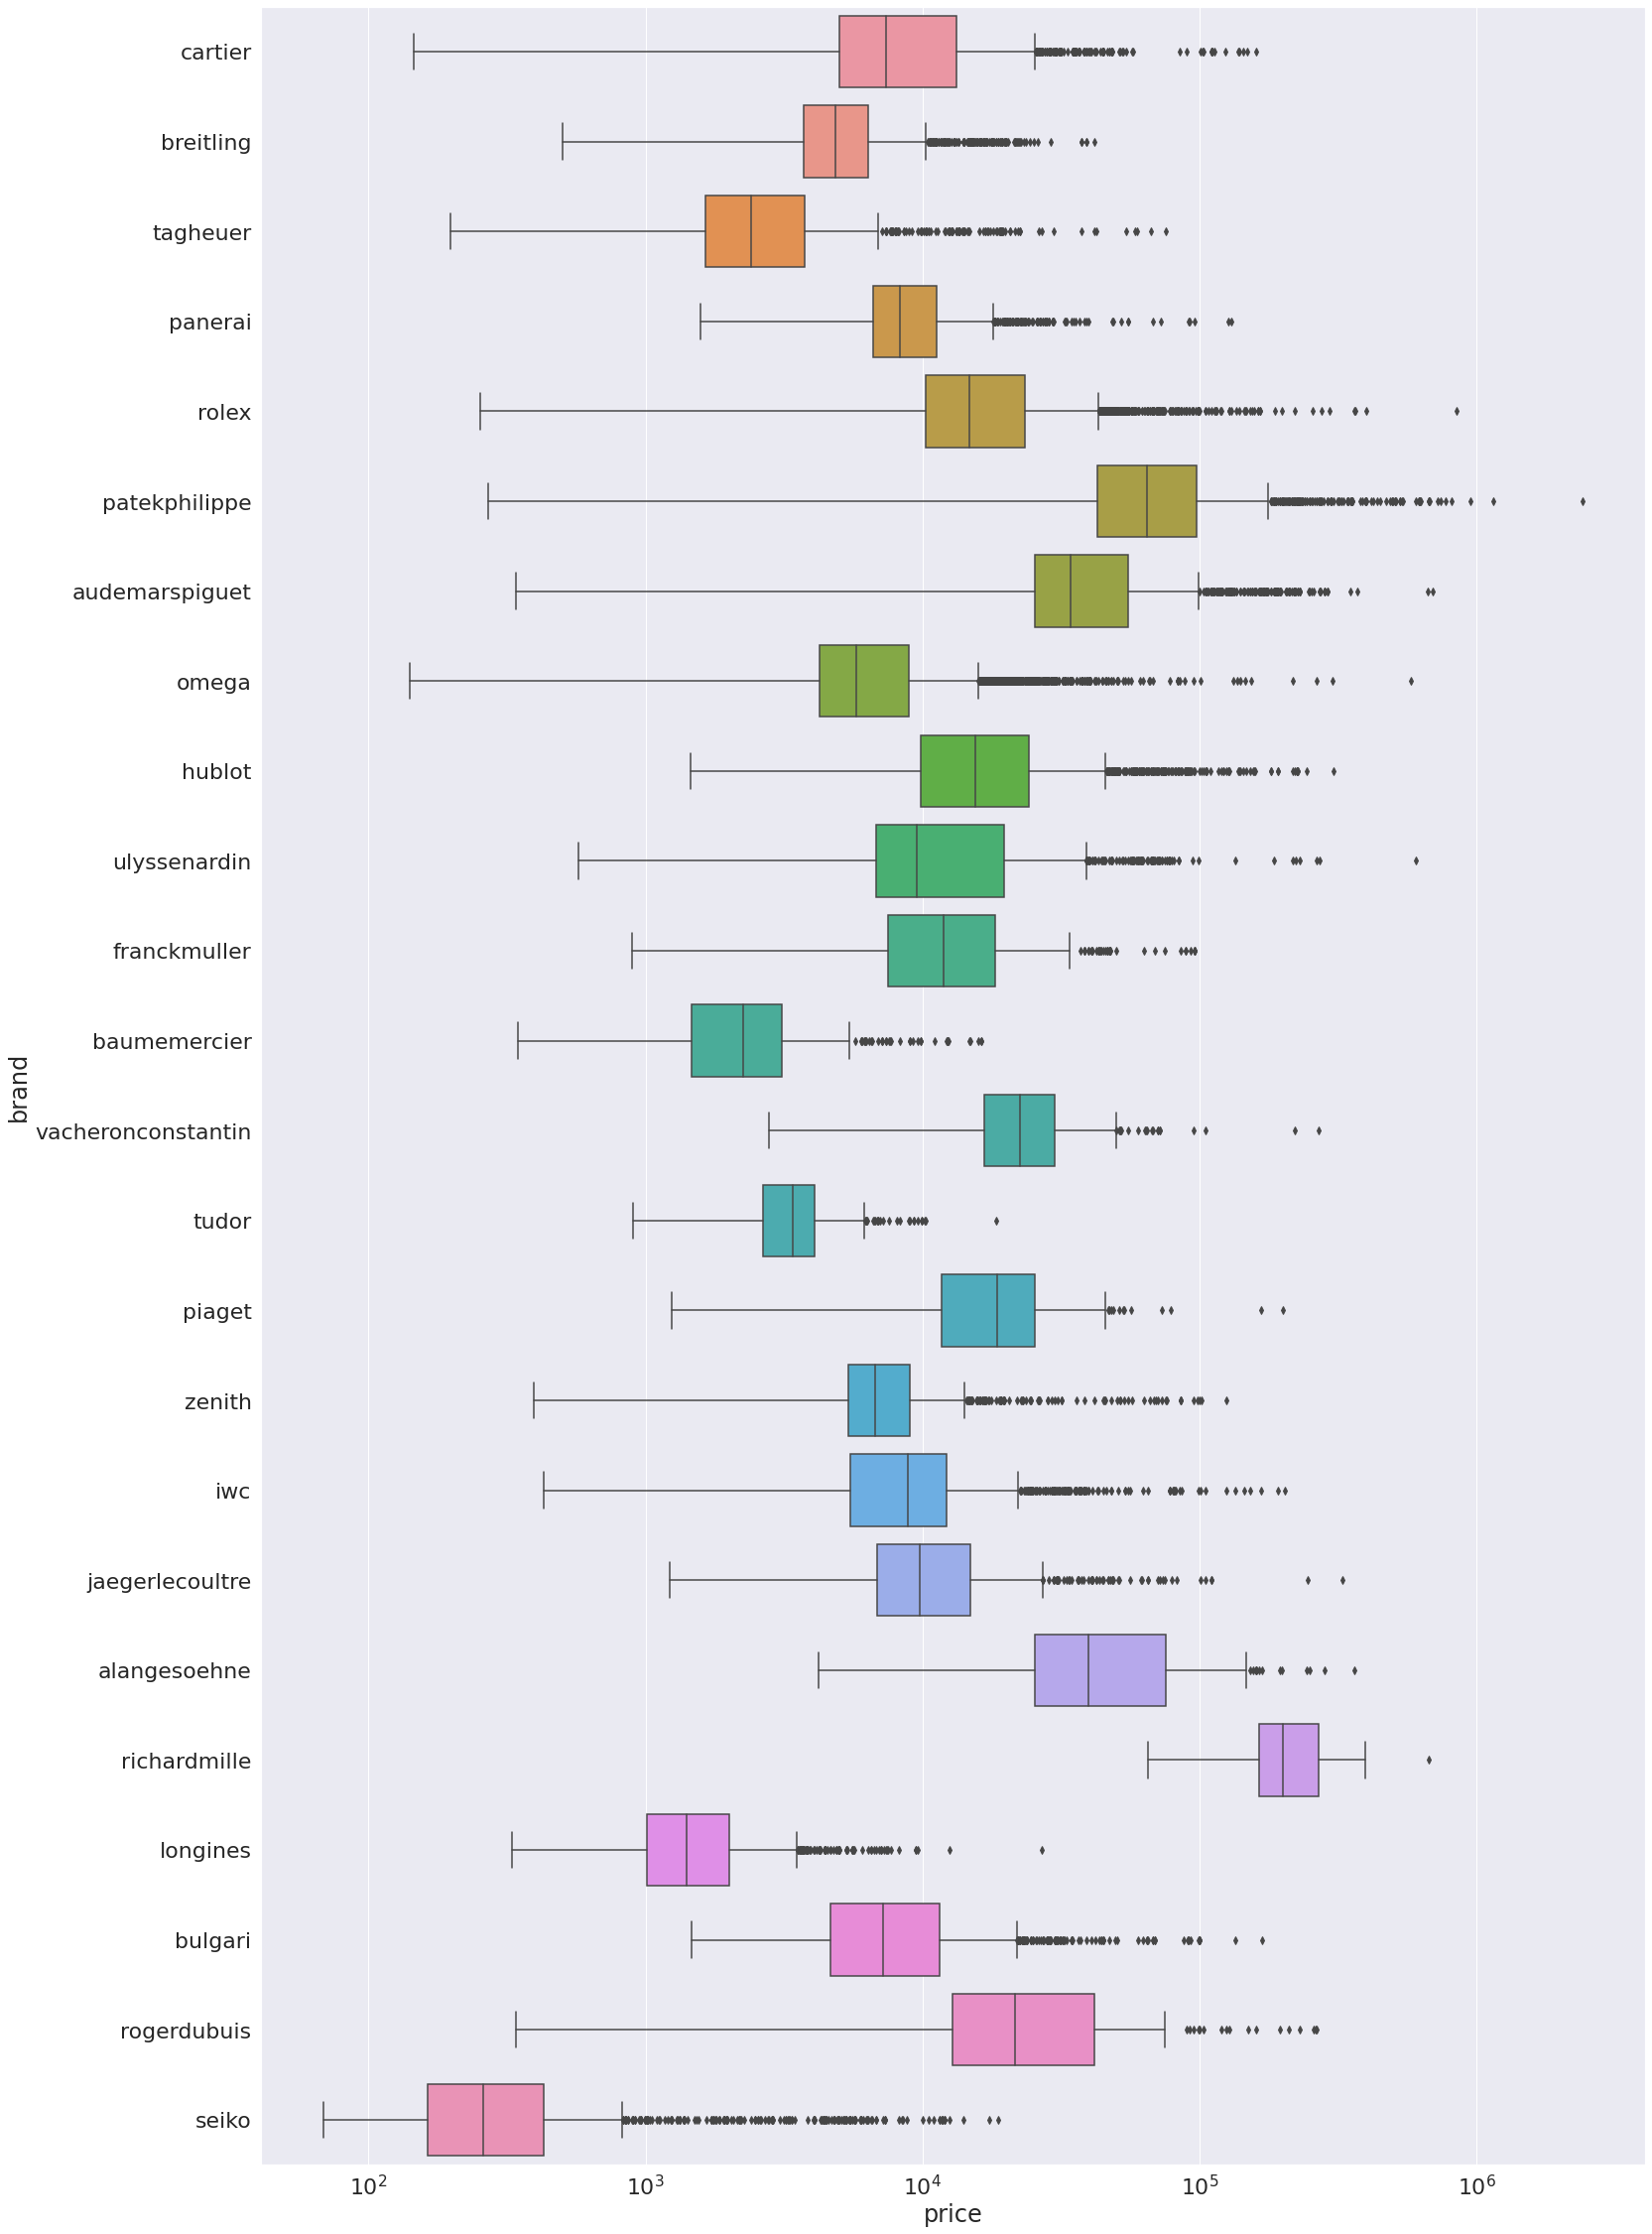

In [561]:
plt.figure(figsize=(25,40))
sns.set(font_scale = 2)
ax = sns.boxplot(y="brand", x="price", data=chrono_df, orient='h')
ax.set_xscale("log")

# 7. Is there any relationship between watch year and the average price of the watch for watches between 1950 and 2020? Creating a linear model to predict the price based on the year would be cool

In [527]:
chrono_filtered = chrono_df[['price','watch_year']].dropna()

X_year = chrono_filtered.watch_year.values.reshape(-1, 1) 
Y_price = chrono_filtered.price.values.reshape(-1, 1) 


linear_regressor = LinearRegression()
linear_regressor.fit(X_year, Y_price) 
Y_price_pred = linear_regressor.predict(X_year)

In [551]:
linear_regressor.score(X_year, Y_price), linear_regressor.coef_

(4.355440797021437e-06, array([[10.50648693]]))

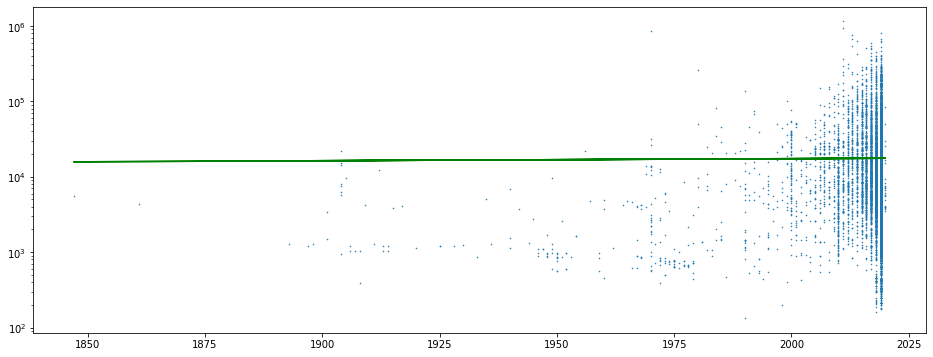

In [535]:
plt.figure(figsize=(16,6))
plt.scatter(X_year, Y_price, s=0.3)
plt.plot(X_year, Y_price_pred, color='green')
plt.yscale('log')
plt.show()

# 8. Create an algorithm to assign the delivery time into the following categories: 0-5 days, 6-10 days, 11-15 days, 16+ days. Use the 'found_on' column as the reference date and the earliest date in the 'delivery' column to calculate the delivery time. Which brands are most readily available? Does the delivery time have a relationship with price?

In [557]:
chrono_dates_df = chrono_df[chrono_df.delivery.notna()] 
chrono_dates_df.early_delivery = pd.to_datetime(chrono_dates_df.delivery.apply(lambda x: x.split(' - ')[0]))
chrono_dates_df.delivery_delta = chrono_dates_df.early_delivery - chrono_dates_df.found_on


In [560]:
bins = [pd.Timedelta(days = 0),
        pd.Timedelta(days = 5),
        pd.Timedelta(days = 10),
        pd.Timedelta(days = 15),
        chrono_dates_df.delivery_delta.max()]

labels = ['0-5 days', '5-10 days', '10-15 days', '16+ days']
chrono_dates_df['delivery_time_cat'] = pd.cut(chrono_dates_df.delivery_delta, bins, labels = labels)

chrono_dates_df.head()

condition                    delivery            found_on  \
0           New  Jan 8, 2020 - Jan 20, 2020 2019-12-23 16:06:17   
1        Unworn  Jan 8, 2020 - Jan 20, 2020 2019-12-23 16:06:19   
2        Unworn  Jan 8, 2020 - Jan 20, 2020 2019-12-23 16:06:19   
3        Unworn  Jan 8, 2020 - Jan 20, 2020 2019-12-23 16:06:19   
4        Unworn  Jan 8, 2020 - Jan 20, 2020 2019-12-23 16:06:19   
...         ...                         ...                 ...   
45731       New  Dec 25, 2019 - Jan 2, 2020 2019-12-23 22:25:20   
45732       New  Dec 25, 2019 - Jan 2, 2020 2019-12-23 22:25:27   
45733       New  Jan 8, 2020 - Jan 20, 2020 2019-12-23 22:25:36   
45734    Unworn  Jan 3, 2020 - Jan 11, 2020 2019-12-23 22:25:37   
45736    Unworn  Jan 3, 2020 - Jan 11, 2020 2019-12-23 22:25:48   

                        model    price                         seller  \
0                      Santos   3735.0                      12enpunto   
1      Exospace B55 Connected   5648.0                      12enpunto   
2              Chrono Cockpit   2598.0                      12enpunto   
3             Tank Américaine  11885.0                      12enpunto   
4                         NaN   1698.0                      12enpunto   
...                       ...      ...                            ...   
45731         Annual Calendar  52195.0              Master Luxury USA   
45732   Portofino Chronograph   5485.0              Master Luxury USA   
45733             Sky-Dweller  48760.0  Masterpiece Jewellers Limited   
45734             Day-Date 40  38216.0  Masterpiece Jewellers Limited   
45736                 Daytona  28337.0  Masterpiece Jewellers Limited   

                                        seller_url  \
0          chrono24.com/dealer/12enpunto/index.htm   
1          chrono24.com/dealer/12enpunto/index.htm   
2          chrono24.com/dealer/12enpunto/index.htm   
3          chrono24.com/dealer/12enpunto/index.htm   
4          chrono24.com/dealer/12enpunto/index.htm   
...                                            ...   
45731  chrono24.com/dealer/masterluxury1/index.htm   
45732  chrono24.com/dealer/masterluxury1/index.htm   
45733    chrono24.com/dealer/masterpiece/index.htm   
45734    chrono24.com/dealer/masterpiece/index.htm   
45736    chrono24.com/dealer/masterpiece/index.htm   

                                                   title  \
0                 Cartier W20066D6 Santos Lady Automatic   
1                       Breitling Exospace B55 Connected   
2                                      Breitling Cockpit   
3                        Cartier W2605456 Tank Americano   
4                                    Breitling Windrider   
...                                                  ...   
45731  Patek Philippe 5396/1G-010 Complications Annua...   
45732  IWC IW391009 Portofino Chronograph Silver Dial SS   
45733                Rolex Sky-Dweller Rare Rhodium Dial   
45734                                  Rolex Day-Date 40   
45736                                      Rolex Daytona   

                                                     url  watch_year  \
0      https://www.chrono24.com/cartier/w20066d6-sant...         NaN   
1      https://www.chrono24.com/breitling/exospace-b5...      2018.0   
2      https://www.chrono24.com/breitling/cockpit--id...      2005.0   
3      https://www.chrono24.com/cartier/w2605456-tank...         NaN   
4      https://www.chrono24.com/breitling/windrider--...         NaN   
...                                                  ...         ...   
45731  https://www.chrono24.com/patekphilippe/53961g-...      2019.0   
45732  https://www.chrono24.com/iwc/iw391009-portofin...      2019.0   
45733  https://www.chrono24.com/rolex/sky-dweller-rar...      2019.0   
45734  https://www.chrono24.com/rolex/day-date-40--id...      2019.0   
45736  https://www.chrono24.com/rolex/daytona--id1281...      2019.0   

                                                     raw          brand  \
0             

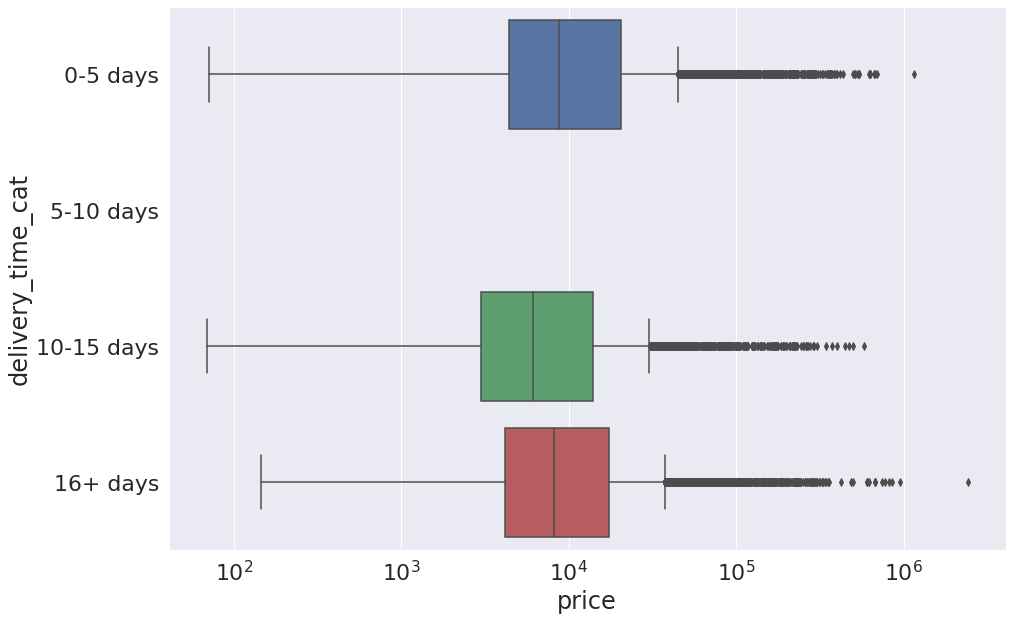

In [564]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 2)
ax = sns.boxplot(y="delivery_time_cat", x="price", data=chrono_dates_df, orient='h')
ax.set_xscale("log")

<AxesSubplot:ylabel='price'>

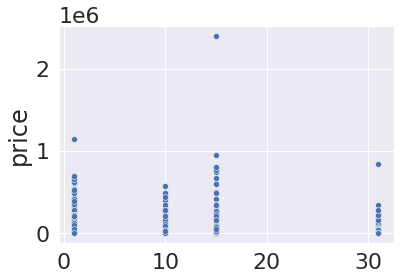

In [569]:
sns.scatterplot(data=chrono_dates_df, x=chrono_dates_df.delivery_delta.dt.days, y="price")